In [22]:
from funlib.persistence import Array, open_ds
import numpy as np
import utils
from importlib import reload

reload(utils)
from utils import InstanceSegmentationOverlapAndScorer

test_array: Array = open_ds(
    filename="/nrs/cellmap/ackermand/predictions/jrc_22ak351-leaf-3m/jrc_22ak351-leaf-3m.n5/processed/validation/finetuned_3d_lsdaffs_weight_ratio_0.50_plasmodesmata_pseudorandom_training_centers_maxshift_18_more_annotations_unet_default_v2_no_dataset_predictor_node_lr_5E-5__0/original_small_validation_box.n5",
    ds_name="iteration_200000_filter_val_0.5_lrb_ratio_-0.08_adj_0.5_lr_-1.2_segs",
)
gt_array: Array = open_ds(
    filename="/nrs/cellmap/ackermand/cellmap/leaf-gall/jrc_22ak351-leaf-3m.n5",
    ds_name="plasmodesmata_as_cylinders",
)
# mask_array: Array = open_ds(
#     filename="/nrs/cellmap/ackermand/cellmap/leaf-gall/prediction_masks.zarr",
#     ds_name="dilation_iterations_1_jrc_22ak351-leaf-3m",
# )
mask_array: Array = open_ds(
    filename="/nrs/cellmap/ackermand/cellpose/jrc_22ak351-leaf-3m/cellpose_results.n5",
    ds_name="raw_s4_inverted_cp_masks_from_jeff_inverted",
)

iss = InstanceSegmentationOverlapAndScorer(
    gt_array,
    test_array,
    mask_array,
    output_directory="/groups/cellmap/cellmap/ackermand/Programming/plasmodesmata_dacapo/validation_and_test/",
    log_dir="/groups/cellmap/cellmap/ackermand/Programming/plasmodesmata_dacapo/validation_and_test/tmp/",
)
data = test_array.to_ndarray()
# print(np.unique(data))
o = iss.process()
# print(o)

block_processing ▶:   0%|          | 0/12 [00:00<?, ?blocks/s]


Execution Summary
-----------------

  Task block_processing:

    num blocks : 12
    completed ✔: 12 (skipped 0)
    failed    ✗: 0
    orphaned  ∅: 0

    all blocks processed successfully


In [13]:
from funlib.persistence import open_ds
import numpy as np

ds = open_ds(
    "/nrs/cellmap/zouinkhim/predictions/v21/2023_12_06_post_processed_2.n5",
    "mito_steps_3/Final_relabel",
)
ds.materialize()
data = ds.data.astype(
    np.uint16
)  # to save memory, might want to downsample for quicker on the fly mesh generation

In [14]:
import neuroglancer
import socket

neuroglancer.set_server_bind_address("0.0.0.0")
viewer = neuroglancer.Viewer()
dimensions = neuroglancer.CoordinateSpace(
    names=["z", "y", "x"], units="nm", scales=ds.voxel_size
)

with viewer.txn() as state:
    state.dimensions = dimensions
    state.layers["raw"] = neuroglancer.ImageLayer(
        source="n5://http://cellmap-vm1.int.janelia.org/nrs/data/jrc_mus-liver-zon-1/jrc_mus-liver-zon-1.n5/em/fibsem-uint8"
    )

    state.layers["mito"] = neuroglancer.SegmentationLayer(
        source=neuroglancer.LocalVolume(
            data=data,
            dimensions=neuroglancer.CoordinateSpace(
                names=["z", "y", "x"],
                units=["nm", "nm", "nm"],
                scales=ds.voxel_size,
                coordinate_arrays=[
                    None,
                    None,
                    None,
                ],
            ),
            voxel_offset=ds.roi.begin / ds.voxel_size,
        ),
    )
    print(viewer)

http://ackermand-ws2.hhmi.org:33447/v/4ac78e1a2476ce535237428de0b9c86dcf61e66b/


In [11]:
ds.roi.begin

(200000, 100000, 10000)

In [10]:
ds.data

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  24,  24,  24],
        [  0,   0,   0, ...,  24,  24,  24],
        [  0,   0,   0, ...,  24,  24,  24]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  24,  24,  24],
        [  0,   0,   0, ...,  24,  24,  24],
        [  0,   0,   0, ...,  24,  24,  24]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  24,  24,  24],
        [  0,   0,   0, ...,  24,  24,  24],
        [  0,   0,   0, ...,  24,  24,  24]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [24]:
socket.gethostbyname_ex(socket.gethostname())

('ackermand-ws2.hhmi.org', ['ackermand-ws2'], ['127.0.1.1'])

In [1]:
import neuroglancer
import numpy as np
import socket

neuroglancer.set_server_bind_address("0.0.0.0")
viewer = neuroglancer.Viewer()
viewer

http://ackermand-ws2.hhmi.org:38631/v/356e1c994870663f4658e4276332432d3db024b4/

In [1]:
import json
from jsonschema import validate

# Describe what kind of json you expect.
schema = {
    "type": "object",
    "properties": {
        "description": {"type": "string"},
        "status": {"type": "boolean"},
        "value_a": {"type": "number"},
        "value_b": {"type": "number"},
    },
}

# Convert json to python object.
my_json = json.loads(
    '{"description": "Hello world!", "status": true, "value_a": 1, "value_b": 3.14}'
)

# Validate will raise exception if given json is not
# what is described in schema.
validate(instance=my_json, schema=schema)

# print for debug
print(my_json)

ModuleNotFoundError: No module named 'jsonschema'

In [3]:
from funlib.geometry import Roi

roi = Roi([0, 0, 0], [1, 1, 1])
print(roi.begin, roi.end, roi.shape, roi)

(0, 0, 0) (1, 1, 1) (1, 1, 1) [0:1, 0:1, 0:1] (1, 1, 1)


In [1]:
from funlib.persistence import open_ds

ds = open_ds("/nrs/cellmap/ackermand/for_alex.zarr", "segmentation")
ds.shape

(44, 216, 216)

In [7]:
from funlib.persistence import Array, open_ds
import numpy as np
import utils
from importlib import reload
run = "finetuned_3d_lsdaffs_jrc_mus-kidney-3_nuclear_pores_pseudorandom_training_centers_unet_default_v2_no_dataset_predictor_node_lr_5E-5__0"
test_ds = open_ds(
    filename = f"/nrs/cellmap/nguyenh3/predictions/jrc_mus-heart-1/jrc_mus-heart-1.n5/processed/test/{run}/jrc_mus-heart-1.n5",
    ds_name = f"iteration_105000_filter_val_0.5_lrb_ratio_-0.08_adj_0.5_lr_-1.2_segs"
)

In [9]:
test_data = test_ds.data[:]

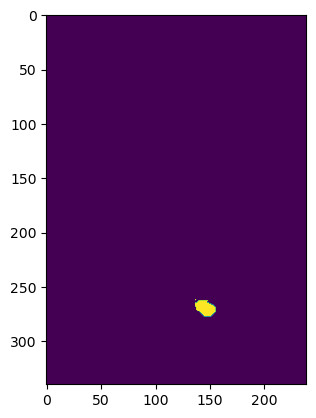

In [19]:
import matplotlib.pyplot as plt
plt.imshow(test_data[101,:,:]==20155401)

In [20]:
%matplotlib inline
import matplotlib
from skimage import measure

segmented_image = test_data == 20155401
# Step 2: Extract surface voxels
verts, faces, _, _ = measure.marching_cubes(segmented_image, level=0)

# Step 3: Convert surface mesh to voxels
# Assuming you want to find the voxels closest to the surface
# You can loop through the vertices and find the voxels that are closest to them
surface_voxels = set()
for vert in verts:
    voxel = np.round(vert).astype(int)
    surface_voxels.add(tuple(voxel))

from cylinder_fitting.fitting import fit
pore = np.array(list(surface_voxels))
w_fit, C_fit, r_fit, fit_err = fit(pore)

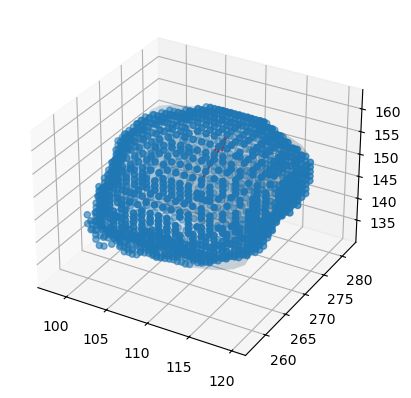

In [21]:
import matplotlib.pyplot as plt
from cylinder_fitting.geometry import rotation_matrix_from_axis_and_angle 

def show_fit(w_fit, C_fit, r_fit, Xs):
    '''Plot the fitting given the fitted axis direction, the fitted
    center, the fitted radius and the data points.
    '''

    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')

    # Plot the data points
    
    ax.scatter([X[0] for X in Xs], [X[1] for X in Xs], [X[2] for X in Xs])
   
    # Get the transformation matrix

    theta = np.arccos(np.dot(w_fit, np.array([0, 0, 1])))
    phi = np.arctan2(w_fit[1], w_fit[0])

    M = np.dot(rotation_matrix_from_axis_and_angle(np.array([0, 0, 1]), phi),
               rotation_matrix_from_axis_and_angle(np.array([0, 1, 0]), theta))

    # Plot the cylinder surface
   
    delta = np.linspace(-np.pi, np.pi, 20)
    z = np.linspace(-10, 10, 20)

    Delta, Z = np.meshgrid(delta, z)
    X = r_fit * np.cos(Delta)
    Y = r_fit * np.sin(Delta)

    for i in range(len(X)):
        for j in range(len(X[i])):
            p = np.dot(M, np.array([X[i][j], Y[i][j], Z[i][j]])) + C_fit

            X[i][j] = p[0]
            Y[i][j] = p[1]
            Z[i][j] = p[2]

    ax.plot_surface(X, Y, Z, alpha=0.2)

    # Plot the center and direction

    ax.quiver(C_fit[0], C_fit[1], C_fit[2], 
            r_fit * w_fit[0], r_fit * w_fit[1], r_fit * w_fit[2], color='red')


    plt.show()
show_fit(w_fit,C_fit,r_fit,pore)